<h2>Million Song data (subset)<h2>

In [1]:
"""
Importing all the libraries
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from pylab import rcParams


In [2]:
"""
read_csv i.e SongPred.csv file from the path where t is stored
"""
#sp_data = pd.read_csv("../SongPred.csv")
sp_data = pd.read_csv("SongPred.csv")


In [3]:
"""
Taking a look at data and its features
"""
print(sp_data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001 entries, 0 to 10000
Data columns (total 23 columns):
artist_familiarity           9997 non-null float64
artist_hotttnesss            10001 non-null float64
artist_id                    10001 non-null object
artist_latitude              3742 non-null float64
artist_location              5709 non-null object
artist_longitude             3742 non-null float64
artist_name                  10001 non-null object
duration                     10001 non-null float64
end_of_fade_in               10001 non-null float64
key                          10001 non-null int64
key_confidence               10001 non-null float64
loudness                     10001 non-null float64
mode                         10001 non-null int64
mode_confidence              10001 non-null float64
release                      10001 non-null object
song_hotttnesss              5649 non-null float64
start_of_fade_out            10001 non-null float64
tempo               

In [4]:
"""
Checking in breif the numerical columns of our data ..
""" 
print(sp_data.describe())

       artist_familiarity  artist_hotttnesss  artist_latitude  \
count         9997.000000       10001.000000      3742.000000   
mean             0.565477           0.385571        37.157357   
std              0.160168           0.143653        15.598494   
min              0.000000           0.000000       -41.280540   
25%              0.467620           0.325305        33.748310   
50%              0.563749           0.380756        38.997920   
75%              0.668020           0.453882        43.648560   
max              1.000000           1.082503        69.651020   

       artist_longitude      duration  end_of_fade_in           key  \
count       3742.000000  10001.000000    10001.000000  10001.000000   
mean         -63.933358    238.511689        0.758564      5.276072   
std           50.508223    114.132569        1.867866      3.553910   
min         -162.436500      1.044440        0.000000      0.000000   
25%          -93.291560    176.038730        0.000000      

In [5]:
"""
Checking what all columns are there in our dataset
"""
print(sp_data.columns) 

Index(['artist_familiarity', 'artist_hotttnesss', 'artist_id',
       'artist_latitude', 'artist_location', 'artist_longitude', 'artist_name',
       'duration', 'end_of_fade_in', 'key', 'key_confidence', 'loudness',
       'mode', 'mode_confidence', 'release', 'song_hotttnesss',
       'start_of_fade_out', 'tempo', 'time_signature',
       'time_signature_confidence', 'title', 'year', 'bbhot'],
      dtype='object')


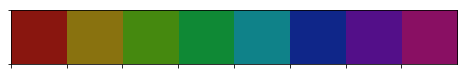

In [6]:
#For color scheme we have used the belwo 2 lines
Set1=sns.palplot(sns.hls_palette(8, l=.3, s=.8))
sns.set_palette("Set1", 8, .75)

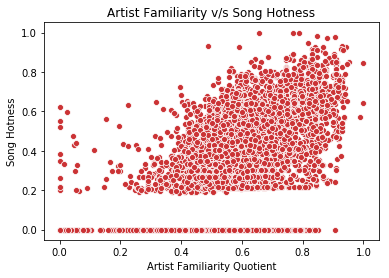

In [7]:
"""
Plotting a bivariate graph between artists familiarty and song hotness
"""
fig=sns.scatterplot(x="artist_familiarity",y="song_hotttnesss",data=sp_data)
plt.xlabel("Artist Familiarity Quotient")
plt.ylabel("Song Hotness")
plt.title("Artist Familiarity v/s Song Hotness")
plt.show(fig)

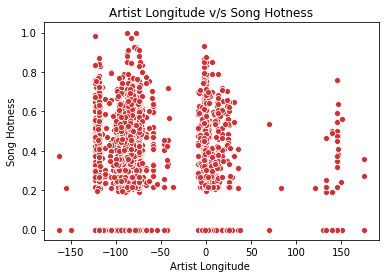

In [8]:
"""
Plotting a bivariate graph between artist longitude and song hotness
"""

fig=sns.scatterplot(x="artist_longitude",y="song_hotttnesss",data=sp_data)
plt.xlabel("Artist Longitude ")
plt.ylabel("Song Hotness")
plt.title("Artist Longitude v/s Song Hotness")
plt.show(fig)

C:\Users\palbh\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


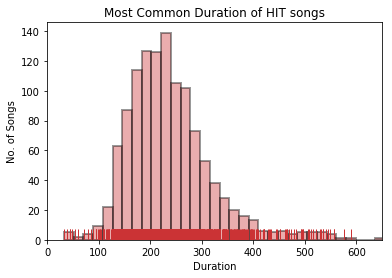

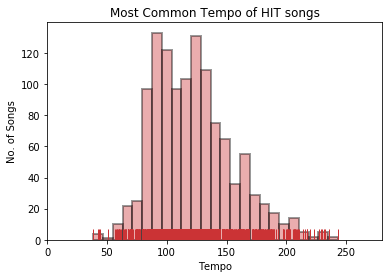

In [9]:
"""
Plotting a univariate graph between of durayion and temp for the songs that are hot
"""

sp_data_hit=sp_data[sp_data["bbhot"]==1]

fig=sns.distplot(sp_data_hit[["duration"]],hist_kws=dict(edgecolor="k", linewidth=2),rug=True, kde=False)
plt.xlabel("Duration")
plt.xlim(0,650)
plt.ylabel("No. of Songs")
plt.title("Most Common Duration of HIT songs")
plt.show(fig)

fig=sns.distplot(sp_data_hit[["tempo"]],hist_kws=dict(edgecolor="k", linewidth=2),rug=True, kde=False)
plt.xlabel("Tempo")
plt.xlim(0,280)
plt.ylabel("No. of Songs")
plt.title("Most Common Tempo of HIT songs")
plt.show(fig)


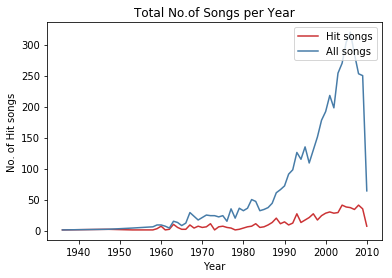

In [10]:
"""
We are trying to analyse how the year affect the song hotness 
"""
sp_data_hit_year=sp_data[(sp_data["bbhot"]==1 )& (sp_data["year"]!=0)]
sp_data_year=sp_data[sp_data["year"]!=0]

df_year_hit=pd.DataFrame(sp_data_hit_year["year"].astype("category").value_counts())
df_year_hit.columns=["hit_count"]
df_year=pd.DataFrame(sp_data_year["year"].astype("category").value_counts())
df_year.columns=["count"]
df_year_final=pd.concat([df_year_hit, df_year], axis=1, join='inner')
df_year_final["year"]=df_year_final.index
sns.lineplot(x="year",y="hit_count",data=df_year_final,)

sns.lineplot(x="year",y="count",data=df_year_final)
plt.xlabel("Year")
plt.ylabel("No. of Hit songs")
plt.title("Total No.of Songs per Year")
plt.legend(['Hit songs','All songs'],loc=1)
plt.show()


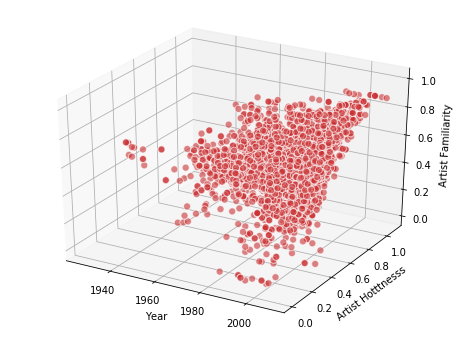

In [11]:

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

sp_data_year=sp_data[sp_data["year"]!=0]
xs = sp_data_year['year']
ys = sp_data_year['artist_hotttnesss']
zs = sp_data_year['artist_familiarity']
ax.scatter(xs, ys, zs, s=50, alpha=0.6, edgecolors='w')

ax.set_xlabel('Year')
ax.set_ylabel('Artist Hotttnesss')
ax.set_zlabel('Artist Familiarity')

plt.show()


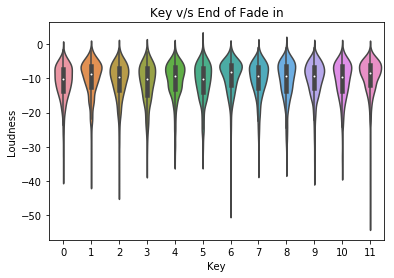

In [12]:
"""
Lets plot density plots of key v/s loudness density plots basically help us determine where
are more number of data points around which value
"""

fig=sns.violinplot(x="key", y="loudness", data=sp_data)
plt.title("Key v/s End of Fade in")
plt.xlabel("Key")
plt.ylabel("Loudness")
plt.show(fig)


In [13]:
# checking the class of key and mode 
print(type(sp_data['key']))
print(type(sp_data['mode']))

# changing the datatype of variables as its depcited by numeric values but internally categorical 
sp_data['key']=sp_data['key'].astype("category")
sp_data['mode']=sp_data['mode'].astype("category")

##########################

print("key and its count",sp_data['key'].value_counts())

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
key and its count 7     1339
0     1213
2     1129
9     1040
1      821
4      810
5      796
11     738
10     700
6      577
8      528
3      310
Name: key, dtype: int64


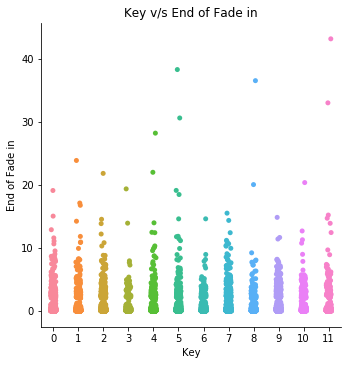

In [14]:
"""
Lets see how does the end of fade in change with key
"""

fig=sns.catplot(x="key", y="end_of_fade_in", data=sp_data)
plt.title("Key v/s End of Fade in")
plt.xlabel("Key")
plt.ylabel("End of Fade in")
plt.show(fig)


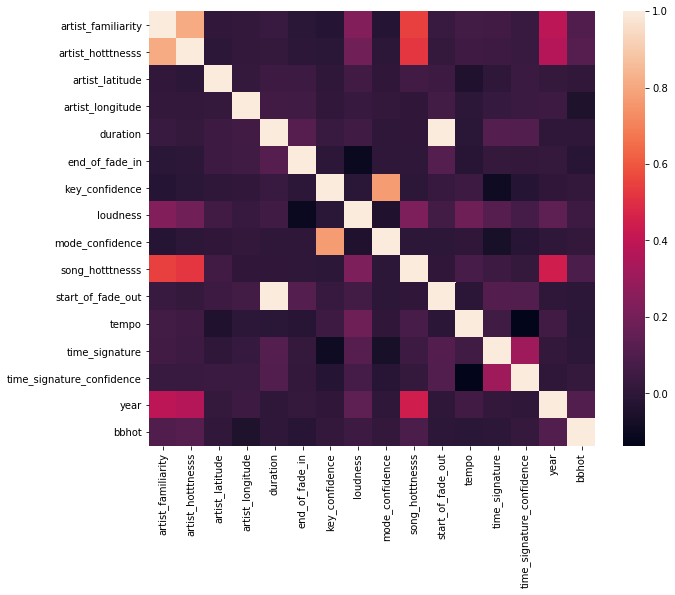

In [15]:
"""
Lets plot the correlation plot and understand how the data is correlated
"""
rcParams['figure.figsize'] = 10, 8
corr = sp_data.corr()

# Plot that gives correlation values 
corr.style.background_gradient()
# Heatmap
sns.heatmap(corr)


100

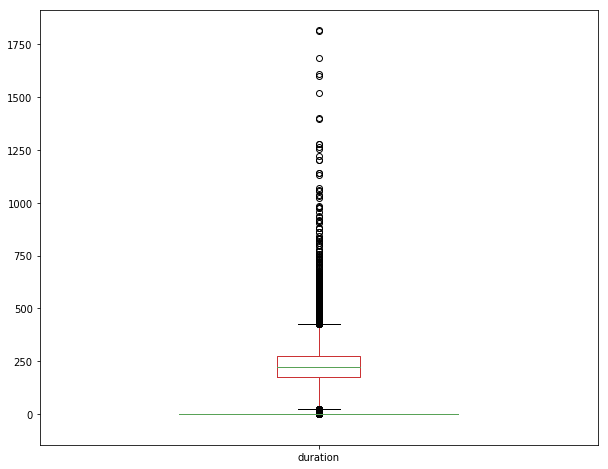

In [16]:
#Columns to be included in dataset for model building ..

"""
Duration and start_of_fade_out have high correlation 
and hence lets keep only one of them
"""


sp_data_col=[ 'artist_hotttnesss','duration', 'end_of_fade_in', 'key', 'key_confidence', 'loudness',
       'mode', 'mode_confidence','tempo', 'time_signature','time_signature_confidence']


sp_data[['artist_familiarity', 'artist_hotttnesss','duration', 'end_of_fade_in', 'key_confidence', 'loudness',
       'mode_confidence','tempo', 'time_signature','time_signature_confidence']].plot(kind="box")

sp_data['duration'].plot(kind="box")
sp_data['duration'].describe()
sp_data['duration'].quantile([.25,.5,.75,.8,.9,.95,.97,.98,.99,1])

sp_data[sp_data['duration']>618]['duration'].count()
# total we have 100 outliers as per the duration value ..

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection  import train_test_split
from sklearn import metrics as sm
from sklearn.preprocessing import scale
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler


sp_data=sp_data.drop_duplicates(subset=None, keep='first', inplace=False) # dropping duplicate rows from the data ..
#sp_data.dropna(subset=['artist_familiarity'],inplace=True)
sp_data_final=sp_data[sp_data_col]

target=sp_data["bbhot"] # bbhot target value ... i.e song is popular or not

print(sp_data_final.isnull().sum()) # Checking Null Values
print(sp_data_final.duplicated().sum()) # Checking if data is duplicate
# we found there were two duplicate rows in our data 


artist_hotttnesss            0
duration                     0
end_of_fade_in               0
key                          0
key_confidence               0
loudness                     0
mode                         0
mode_confidence              0
tempo                        0
time_signature               0
time_signature_confidence    0
dtype: int64
1


In [18]:
from imblearn.over_sampling import SMOTE
#We need to scale data before applying any algorithim
sp_data_s = sp_data_final.copy()
for col in sp_data_s.columns:
    if sp_data_s[col].dtype == np.float64 or sp_data_s[col].dtype == np.int64:
        sp_data_s[col] = scale(sp_data_s[col])


print(sp_data_s.isnull().sum())
print("sp_data",sp_data_s.head())


sp_train,sp_test,tar_train,tar_test=train_test_split(sp_data_s,target,test_size=0.10,random_state=10)
sme = SMOTE(random_state=2)
sp_train_res, tar_train_res = sme.fit_sample(sp_train, tar_train.ravel())

knn=KNeighborsClassifier(metric='minkowski', weights='uniform',p=2,n_neighbors=5).fit(sp_train_res,tar_train_res)
knn
predict=knn.predict(sp_test)

print(sm.accuracy_score(tar_test,predict))
ac_knn=sm.accuracy_score(tar_test,predict)
fpr, tpr, threshold = sm.roc_curve(tar_test,predict)
roc_auc = sm.auc(fpr, tpr)
print("Roc/auc",roc_auc)


C:\Users\palbh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


artist_hotttnesss            0
duration                     0
end_of_fade_in               0
key                          0
key_confidence               0
loudness                     0
mode                         0
mode_confidence              0
tempo                        0
time_signature               0
time_signature_confidence    0
dtype: int64
sp_data    artist_hotttnesss  duration  end_of_fade_in key  key_confidence  loudness  \
0           1.313857  0.365433       -0.278724   5        0.383425  1.329687   
1           0.114490 -0.171519       -0.273905   1        1.041702 -0.131740   
2           0.222413 -0.792698       -0.326907   6       -1.020414  0.119023   
3          -0.293259 -0.534751       -0.255167   8        0.703471  0.147544   
4           0.478132 -0.044719       -0.406142   0        1.096255  0.272741   

  mode  mode_confidence     tempo  time_signature  time_signature_confidence  
0    1         0.116165  1.429385        1.133492                  -1.044313  

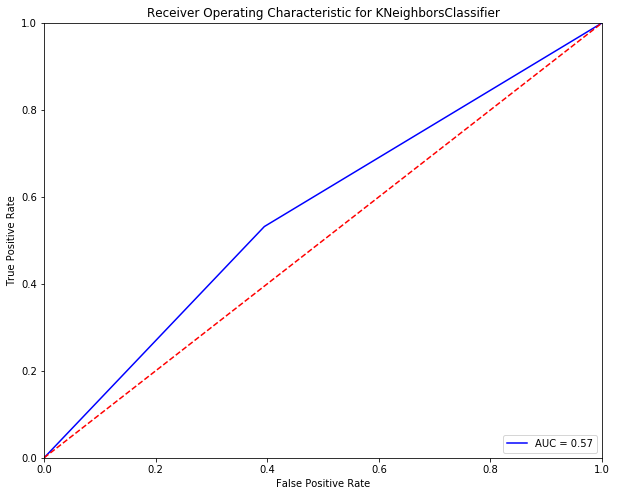

In [19]:
import matplotlib.pyplot as plt

# Plotting the roc curve ..

plt.title('Receiver Operating Characteristic for KNeighborsClassifier')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

# this has been done above ..
#cer_train,cer_test,tar_train,tar_test=train_test_split(cer_s,target,test_size=0.2,random_state=18)
logr=LogisticRegression().fit(sp_train_res,tar_train_res)

pred=logr.predict(sp_test)
#To check the porbbility wise prediction of each class ...
print(logr.predict_proba(sp_test))

print("Accuracy score",sm.accuracy_score(pred,tar_test))
fpr, tpr, threshold = sm.roc_curve(tar_test,predict)
roc_auc = sm.auc(fpr, tpr)
ac_log=59.6

print("Logistic Regression Auc value ",roc_auc)

print(confusion_matrix(tar_test,pred))

C:\Users\palbh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[[0.42633276 0.57366724]
 [0.3681257  0.6318743 ]
 [0.49698619 0.50301381]
 ...
 [0.49545913 0.50454087]
 [0.51370758 0.48629242]
 [0.36695143 0.63304857]]
Accuracy score 0.575
Logistic Regression Auc value  0.5685045948203842
[[503 371]
 [ 54  72]]


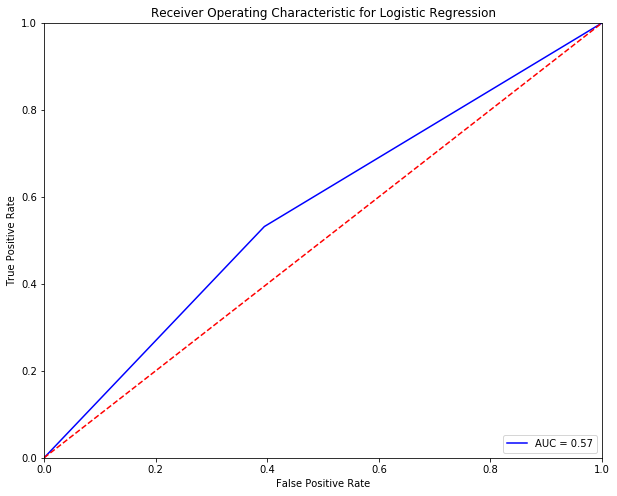

In [21]:
import matplotlib.pyplot as plt

# Plotting the roc curve ..

plt.title('Receiver Operating Characteristic for Logistic Regression')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()



C:\Users\palbh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\palbh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\palbh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\palbh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\palbh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

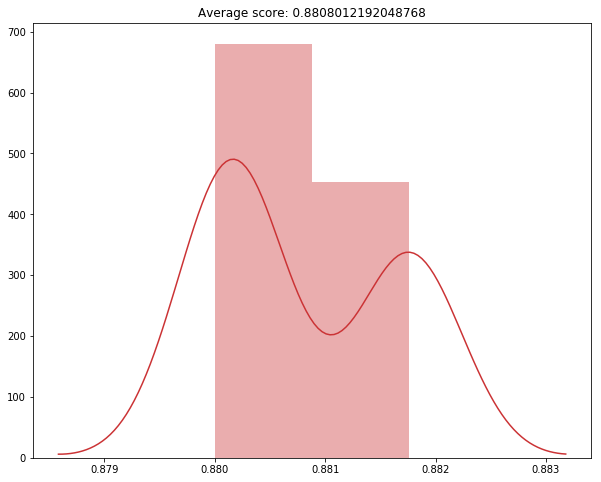

In [22]:
from sklearn.model_selection import cross_val_score
from xgboost.sklearn import XGBClassifier

# Applying logistic Regression along with cross validation 
lr = LogisticRegression()
lr.fit(sp_train_res,tar_train_res)

# Function for applying cross validation on different models
def model_accuracy(model,train,target,cross_val):
    cv_scores = cross_val_score(model,train,target, cv=cross_val)
    sns.distplot(cv_scores)
    plt.title('Average score: {}'.format(np.mean(cv_scores)))


model_accuracy(lr, sp_data_s, target,20)


Best score: 0.8811
Best parameters: {'criterion': 'gini', 'max_depth': 4, 'max_features': 3, 'splitter': 'random'}


C:\Users\palbh\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\palbh\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


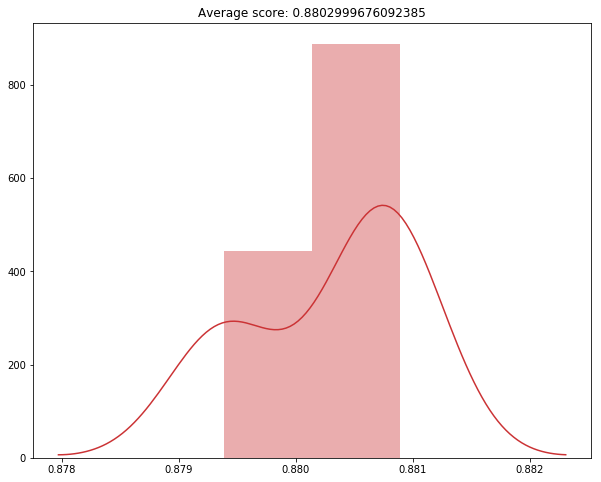

In [23]:

from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold

dtc = DecisionTreeClassifier()

parameter_grid = {'criterion': ['gini', 'entropy'],
                  'splitter': ['best', 'random'],
                  'max_depth': [1, 2, 3, 4, 5],
                  'max_features': [1, 2, 3, 4]}

cross_validation = StratifiedKFold( n_splits=10).get_n_splits(sp_data_s, target)

grid_search = GridSearchCV(dtc, param_grid=parameter_grid, cv=cross_validation)

grid_search.fit(sp_data_s, target)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

dtc = grid_search.best_estimator_
cv_scores = cross_val_score(dtc,sp_data_s, target)
sns.distplot(cv_scores)
plt.title('Average score: {}'.format(np.mean(cv_scores)))


acc_cross=cv_scores.max()

In [24]:
sp_data_ohe=pd.get_dummies(sp_data_final, columns=["key","mode"])
sp_data_ohe_s=scale(sp_data_ohe)

sp_train,sp_test,tar_train,tar_test=train_test_split(sp_data_ohe_s,target,test_size=0.3,random_state=20)
#Applying smote on training dataset so as to overcome skewness in the data
sme = SMOTE(random_state=2)
sp_train_res, tar_train_res = sme.fit_sample(sp_train, tar_train.ravel())

xgb_m=XGBClassifier(learning_rate =0.1,n_estimators=100, max_depth=5,
                    min_child_weight=1, gamma=0, subsample=0.8,
                    colsample_bytree=0.8, objective= 'binary:logistic',
                    nthread=4, scale_pos_weight=1, seed=27).fit(sp_train_res,tar_train_res)


predict=xgb_m.predict(sp_test)

print("Accuracy score of XGB Classifier",sm.accuracy_score(tar_test,predict))


fpr, tpr, threshold = sm.roc_curve(tar_test,predict)
roc_auc = sm.auc(fpr, tpr)

fpr, tpr, threshold = sm.roc_curve(tar_test,predict)
roc_auc = sm.auc(fpr, tpr)
print("ROC/AUC value for XGB Classifier",roc_auc)

C:\Users\palbh\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by the scale function.
  


Accuracy score of XGB Classifier 0.7346666666666667
ROC/AUC value for XGB Classifier 0.5346381314671235


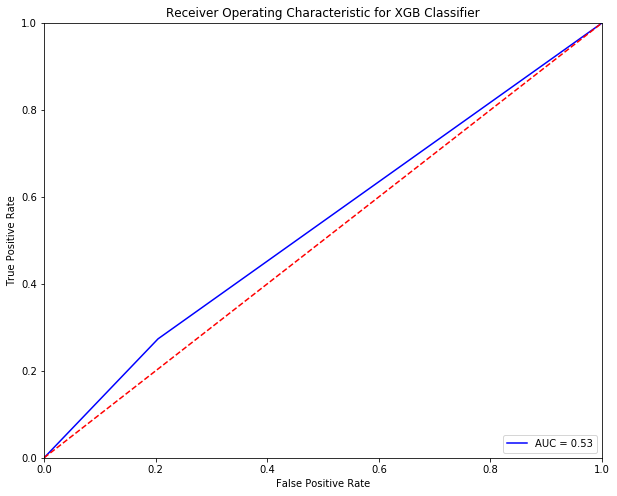

In [25]:
import matplotlib.pyplot as plt

# Plotting the roc curve ..

plt.title('Receiver Operating Characteristic for XGB Classifier')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

C:\Users\palbh\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


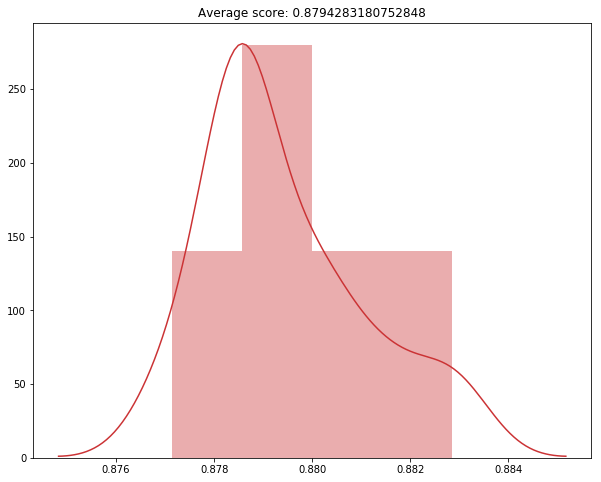

In [26]:
#Lets apply XGB classifier along with cross validaton and see if there is any improvement
xgb_m=XGBClassifier(learning_rate =0.1,n_estimators=100, max_depth=5,
                    min_child_weight=1, gamma=0, subsample=0.8,
                    colsample_bytree=0.8, objective= 'binary:logistic',
                    nthread=4, scale_pos_weight=1, seed=27)


model_accuracy(xgb_m,sp_train,tar_train,10)